In [11]:

#Pre-process the Reviews /Users/khanfarabi/OneDrive - The University of Memphis/Explain_MLN/Explanation_yelp/
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
import gensim 
import operator
from gensim.models import Word2Vec
#from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (precision_score,recall_score,f1_score)
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from sklearn import svm
#from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (precision_score,recall_score,f1_score)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
import random
import sys
import random
import re
from collections import defaultdict
import sys
from nltk.cluster import KMeansClusterer
import nltk
from sklearn import cluster
from sklearn import metrics
import gensim 
import operator
from gensim.models import Word2Vec
import sys
import numpy as np
import collections
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
def Run_program(ch):
                class relational_lime:
                                @classmethod
                                def run_all(cls):

                                                def data_pr():
                                                            ifile1 = open("full-meta-data.txt")
                                                            revid = 0
                                                            users = defaultdict(list)
                                                            for ln in ifile1:
                                                                parts = ln.strip().split("\t")
                                                                users[parts[0]].append(revid)
                                                                revid = revid + 1
                                                            ifile1.close()
                                                            #pass#pass#print(users)
                                                            H11=defaultdict(list)
                                                            #sys.exit()
                                                            userids = []
                                                            #pass#pass#print(users)
                                                            c =0
                                                            #Select reviewer subset based on tunable parameters (max-reviews and min-reviews limit,sampling ratio)
                                                            minreviews =5
                                                            maxreviews =20
                                                            samplingratio =0.15
                                                            for u in users:
                                                                if len(users[u])>minreviews and len(users[u])<maxreviews:        
                                                                    if random.random() < samplingratio:
                                                                        userids.append(u)
                                                                        c= c + len(users[u])

                                                            ifile = open("reviewContent.txt",encoding='ISO-8859-1')
                                                            ifile1 = open("full-meta-data.txt")
                                                            s_words = []
                                                            sfile = open("Words.txt")
                                                            for ln in sfile:
                                                                s_words.append(ln.strip())
                                                            sfile.close()
                                                            stopwords = []
                                                            sfile = open("stopwords.txt")
                                                            for ln in sfile:
                                                                stopwords.append(ln.strip())
                                                            sfile.close()

                                                            flags = (re.UNICODE if sys.version < '3' and type(text) is unicode
                                                                     else 0)
                                                            ofile = open("all_revs1.txt",'w')
                                                            ofile1 = open("metadata.txt",'w')
                                                            cnt = 0
                                                            revid = 0
                                                            qrat={}
                                                            windex = defaultdict(list)
                                                            #Tunable parameter to keep non-sentiment words
                                                            PNonSentWords = 0.30
                                                            WORDS={}
                                                            w_per_ht=defaultdict(list)
                                                            w_per_user=defaultdict(list)
                                                            Rev_text_map={}
                                                            for ln in ifile:
                                                                ln1 = ifile1.readline()
                                                                parts1 = ln1.strip().split("\t")
                                                                #pass#pass#print(parts1)
                                                                if parts1[0] not in userids:
                                                                    continue
                                                                #if cnt >= 10000:
                                                                #    break
                                                                keep = []
                                                                parts = ln.strip().split("\t")
                                                                for word in re.findall(r"\w[\w']*", parts[3], flags=flags):
                                                                    if word.isdigit() or len(word)==1:
                                                                        continue
                                                                    word_lower = word.lower()
                                                                    if word_lower in stopwords:
                                                                        continue
                                                                   # if word_lower in s_words:
                                                                        #keep.append(word_lower)
                                                                    elif random.random() < PNonSentWords:
                                                                        if not any(c.isdigit() for c in word_lower) and "'" not in word_lower:
                                                                            keep.append(word_lower)
                                                                if float(parts1[2])<=2:
                                                                    cl = 0
                                                                elif float(parts1[2])==3:
                                                                    cl = 1
                                                                elif float(parts1[2])>=4:
                                                                    cl = 2
                                                                if len(keep)>=10:
                                                                    cnt = cnt + 1
                                                                    ofile.write(" ".join(keep)+"\t"+str(cl)+"\n")
                                                                    WORDS[revid]=keep

                                                                    qrat[revid]=cl
                                                                    Rev_text_map[revid]=parts[3]
                                                                    H11[parts1[1]].append(revid)
                                                                    ofile1.write(ln1)
                                                                    for w in keep:
                                                                        windex[w].append(revid)
                                                                        w_per_ht[w].append(parts1[1])
                                                                        w_per_user[w].append(parts1[0])
                                                                    revid = revid + 1
                                                            ofile.close()
                                                            ofile1.close()
                                                            ifile.close()
                                                            ifile1.close()

                                                            #Tunable parameter (keep words only if repeated in > NumReps reviews)
                                                            NumReps = 10

                                                            #Filter review words
                                                            ifile = open("all_revs1.txt",encoding="ISO-8859-1")
                                                            ofile = open("processed_revs_1.txt",'w')
                                                            for ln in ifile:
                                                                parts = ln.strip().split("\t")
                                                                keep = []
                                                                for w in parts[0].split(" "):
                                                                    if len(windex[w])>NumReps:
                                                                        keep.append(w)
                                                                ofile.write(" ".join(keep)+"\t"+parts[1]+"\n")
                                                            ofile.close()
                                                            ifile.close()
                                                            pass#pass#print("Total Reviews="+str(len(WORDS)))
                                                            return WORDS,qrat,H11,Rev_text_map,s_words,stopwords
                                                def data_balancing(WORDS):
                                                    WORDS1={}
                                                    t1=[]
                                                    t2=[]
                                                    t3=[]
                                                    c1=0
                                                    c2=0
                                                    c3=0
                                                    for y in WORDS:
                                                        if qrat[y]==0:
                                                            if c3<100:
                                                                t1.append(y)
                                                                WORDS1[y]=WORDS[y]
                                                                c3=c3+1
                                                        elif qrat[y]==1:
                                                            continue
                                                            #if c1<515:
                                                                #t2.append(y)
                                                                #WORDS1[y]=WORDS[y]
                                                                #c1=c1+1
                                                        elif qrat[y]==2:
                                                            if c2<100:
                                                                t3.append(y)
                                                                WORDS1[y]=WORDS[y]
                                                                c2=c2+1
                                                    pass#pass#print(len(t1),len(t2),len(t3),len(WORDS1))
                                                    return WORDS1

                                                def train_data_gen(WORDS1):
                                                    #train and target data
                                                    w11=[]
                                                    trg11=[]
                                                    w12=[]
                                                    trg1=[]
                                                    for tt in WORDS1:
                                                        s=' '
                                                        #if qrat[tt]!=1:
                                                        for kk in WORDS1[tt]:
                                                           # if qrat[tt]!=1:
                                                                w11.append(kk)
                                                                s=str(kk)+s+"\t"
                                                                #pass#pass#print(kk)
                                                                if float(qrat[tt])==2:
                                                                        trg11.append(1)
                                                                else:
                                                                        trg11.append(0)
                                                            #w12.append(s)
                                                            #trg1.append(qrat[tt])

                                                    return w11,trg11
                                                def svm_coeff(w11,trg):
                                                                    #SVM Learner and generate feature weights
                                                                    #OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0)
                                                                    #Learn SVM Model
                                                                    #ifile = open("processed_revs_1.txt",encoding="ISO-8859-1")
                                                                    Y = trg
                                                                    words =w11
                                                                    unique_words =[]
                                                                    ss=set(words)
                                                                    for w1 in ss:
                                                                            if w1 not in unique_words:
                                                                                unique_words.append(w1)

                                                                    '''
                                                                    #tf_transformer = TfidfVectorizer()
                                                                    #f = tf_transformer.fit_transform(words)
                                                                    #features = [((i, j), f[i,j]) for i, j in zip(*f.nonzero())]
                                                                    #unique_word_ids = []
                                                                    #for w in unique_words:
                                                                       # i = tf_transformer.vocabulary_.get(w)
                                                                        #unique_word_ids.append(i)

                                                                    #clf =OneVsRestClassifier(SVC(kernel='linear'))#svm.LinearSVC(C=1)
                                                                    #clf.fit(f,Y)
                                                                    #p = clf.predict(f)
                                                                    #pass#pass#print(f1_score(Y,p,average='weighted'))

                                                                    '''
                                                                    tf_transformer = TfidfVectorizer()
                                                                    f = tf_transformer.fit_transform(words)
                                                                    features = [((i, j), f[i,j]) for i, j in zip(*f.nonzero())]
                                                                    unique_word_ids = []
                                                                    for w in unique_words:
                                                                        i = tf_transformer.vocabulary_.get(w)
                                                                        unique_word_ids.append(i)

                                                                    #clf =svm.LinearSVC(C=100,probability=True)
                                                                    clf=svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', random_state=None)
                                                                    #svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', random_state=None)

                                                                    #OneVsRestClassifier(LinearSVC(random_state=0)) #svm.LinearSVC(C=1)
                                                                    clf.fit(f,Y)
                                                                    #clf.fit(f,Y)
                                                                    p = clf.predict(f)
                                                                    pass#pass#print(f1_score(Y,p,average='micro'))
                                                                    from sklearn.metrics import accuracy_score
                                                                    pass#pass#print(accuracy_score(Y,p))

                                                                    #Store learned weights

                                                                    #Tunable parameter, normalization range of weights
                                                                    rangelower=0
                                                                    rangehigher=1

                                                                    C = clf.coef_
                                                                    scaler = MinMaxScaler(feature_range=(rangelower,rangehigher))
                                                                    vals = []
                                                                    for i, j in zip(*C.nonzero()):
                                                                        vals.append([C[i,j]])
                                                                    scaler.fit(vals)
                                                                    V1 = scaler.transform(vals)
                                                                    rows,cols = C.nonzero()
                                                                    r_wts =  defaultdict(list)
                                                                    ix= 0
                                                                    for w in unique_words:
                                                                        r_wts[w] = [0]  
                                                                    for i, j in zip(*C.nonzero()):
                                                                        #pass#pass#print(i,j)
                                                                        for k in tf_transformer.vocabulary_.keys():
                                                                            if tf_transformer.vocabulary_[k]==j:
                                                                                if k not in r_wts:
                                                                                    break
                                                                                else:
                                                                                    #if float(V1[ix][0])>0:
                                                                                    r_wts[k][i] = V1[ix][0]
                                                                                    break
                                                                        ix = ix + 1


                                                                    #pass#pass#print(r_wts)
                                                                    return r_wts
                                                #  Extracting Samehote Relation
                                                def sm_h(WORDS1,H11):
                                                    H1={}
                                                    fl=open("samehote.txt","w")
                                                    for tt in H11:
                                                        gh=[]
                                                        for kk in H11[tt]:
                                                            if kk in WORDS1:
                                                                if kk not in gh:
                                                                    gh.append(kk)
                                                        if len(gh)>1:
                                                            H1[tt]=gh
                                                            ggg=str(tt)+"::"+str(gh)
                                                            fl.write(str(ggg)+"\n")
                                                    fl.close()       
                                                    for t in H1:
                                                        pass#pass#pass#print(t,H1[t])   
                                                    #pass#pass#print(len(H1))
                                                    return H1
                                                #Sentance generation  for Neural Word2Vec Embedding Training
                                                def snt_emd(WORDS1):
                                                    sent=[]
                                                    sent1=[]
                                                    sent_map=defaultdict(list)
                                                    for ty in WORDS1:
                                                        gh=[]
                                                        gh.append(str(ty))
                                                        #gh1=[]
                                                        #gh2=[]
                                                        for j in WORDS1[ty]:
                                                            j1=str(j)
                                                            #gh.append(str(ty))
                                                            if j1 not in gh:
                                                                gh.append(j1)

                                                        if gh not in sent:
                                                                sent.append(gh)       
                                                    documents=[]
                                                    #documents1=[]
                                                    for t in sent:
                                                        for jh in t:
                                                                 documents.append(jh)
                                                    return sent,documents
                                                # Clustering the queries
                                                def kmean_cls(sent,documents,WORDS1):

                                                        model = Word2Vec(sent, min_count=1)
                                                        X = model[model.wv.vocab]
                                                        NUM_CLUSTERS=5
                                                        kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,repeats=25)
                                                        assigned_clusters1 = kclusterer.cluster(X,assign_clusters=True)
                                                        #pass#pass#print (assigned_clusters)
                                                        cluster={}
                                                        words = list(model.wv.vocab)
                                                        for i, word in enumerate(words):
                                                                gh=[] 
                                                                gh1=[] 
                                                                gh2=[] 
                                                                if word.isdigit(): 
                                                                    cluster[word]=assigned_clusters1[i]

                                                        cluster_final={}
                                                        for j in range(NUM_CLUSTERS):
                                                            gg=[]
                                                            for tt in cluster:
                                                                if int(cluster[tt])==int(j):
                                                                    if tt not in gg:
                                                                        gg.append(tt)
                                                            if len(gg)>0:
                                                                        cluster_final[j]=gg
                                                        cc=0
                                                        final_clu={}
                                                        for t in cluster_final:
                                                            ghh=[]
                                                            for k in cluster_final[t]:
                                                                if int(k) in WORDS1:
                                                                       ghh.append(int(k))
                                                            if len(ghh)>=2:
                                                                    final_clu[cc]=ghh
                                                                    cc=cc+1
                                                        s=0
                                                        for k in final_clu:
                                                              s=s+len(final_clu[k])
                                                       # pass#pass#print(s)
                                                        return final_clu

                                                def sm_user():
                                                    #Store similarity relations based on if they were written by same user
                                                        ifile = open("processed_revs_1.txt",encoding="ISO-8859-1")
                                                        ifile1 = open("metadata.txt")
                                                        SIM = collections.defaultdict(list)
                                                        userindex = {}
                                                        Sho= collections.defaultdict(list)
                                                        posrev=[]
                                                        negrev=[]
                                                        hotelindex={}
                                                        evida=[]
                                                        revid = 0
                                                        for ln in ifile:
                                                            parts = ln.strip().split("\t")
                                                            #if float(parts[1])==2:
                                                               # ppr="Positive("+str(revid)+")"
                                                                #posrev.append(ppr)
                                                                #if ppr not in evida:
                                                                    #pass#evida.append(ppr)
                                                            #elif float(parts[1])==0:
                                                                #ppr1="Negative("+str(revid)+")"
                                                                #negrev.append(ppr1)
                                                                #if ppr1 not in evida:
                                                                   # pass#evida.append(ppr1)
                                                            ln1 = ifile1.readline()
                                                            parts1 = ln1.strip().split("\t")
                                                           # pass#pass#print(parts1)
                                                            SIM[parts1[0]].append(revid)
                                                            Sho[parts1[1]].append(revid)
                                                            userindex[revid] = parts1[0]
                                                            hotelindex[revid]=parts1[1]
                                                            revid = revid + 1    
                                                        ifile.close()
                                                        ifile1.close()
                                                        #pass#pass#print(SIM)
                                                        Samuser_index={}
                                                        for t in SIM:
                                                            gh=[]
                                                            for k in SIM[t]:
                                                                if len(SIM[t])>0:
                                                                    for e in SIM[t]:
                                                                        if e not in gh and e in WORDS:
                                                                            gh.append(e)
                                                            if gh!=[]:
                                                                Samuser_index[t]=gh
                                                        for d in Samuser_index:
                                                            pass#pass#pass#print(d,Samuser_index[d])          
                                                        #pass#pass#print(len(Samuser_index))
                                                        return Samuser_index
                                                #Annotated Word exp Used for validation
                                                def annotation_wordexp(WORDS1,s_words,stopwords):
                                                    ann1={}
                                                    c=0
                                                    for k in WORDS1:
                                                        if qrat[k]==2:
                                                            c=c+1
                                                            c2=0
                                                            gff=[]
                                                            for gg in WORDS1[k]:
                                                                if gg in s_words:
                                                                    if c2<20:
                                                                             gff.append(gg)
                                                                             c2=c2+1
                                                            if len(gff)>0:
                                                               # if k in WORDSt:
                                                                    ann1[k]=gff

                                                        elif qrat[k]==0:
                                                            c=c+1
                                                            c3=0
                                                            gff1=[]
                                                            for gg in WORDS1[k]:
                                                                if gg in s_words:
                                                                    if c3<20:
                                                                            gff1.append(gg)
                                                                            c3=c3+1

                                                            if len(gff1)>0:
                                                                #if k WORDSt:
                                                                    ann1[k]=gff1
                                                    ann={}
                                                    for t in ann1:
                                                        if t in WORDS1:
                                                            ann[t]=ann1[t]
                                                    pass#pass#print(len(ann))
                                                    gg=open("Review_Word_annotation.txt","w")
                                                    for t in ann:
                                                        vv=str(t)+":"+str(ann[t])
                                                        gg.write(str(vv)+"\n")
                                                        pass#pass#print(t,ann[t])
                                                    gg.close()
                                                    return ann
                                                def feedback_gen(final_clu):
                                                    d_tt={}
                                                    d_tt[0]="negative"
                                                    d_tt[2]="positive"
                                                    wr={}
                                                    w=[]
                                                    for k in final_clu:
                                                            #c=-1
                                                            #c=c+1
                                                            md=int(len(final_clu[k])/2)
                                                            c=0      
                                                            k1= final_clu[k][md+c]
                                                            #pass#pass#print(k1,md)        
                                                            if k1 in ann:
                                                                        for k3 in ann[k1]:
                                                                                w.append(k3)
                                                            else:
                                                                c=c+11
                                                                continue 


                                                            #pass#pass#print(k,k1,md,d_tt[qrat[k1]],w)
                                                            wr[k1]=w
                                                    #pass#pass#print(w)
                                                    return w

                                                #Update Evidence Based on manual annotation Update 2 

                                                def update_evid_annotation(w,WORDS1):
                                                                model = Word2Vec(sent, min_count=1)
                                                                data_g={}
                                                                for t in WORDS1:
                                                                    chu=[]
                                                                    #try:
                                                                    vb={}
                                                                    for v in w:
                                                                        vb1={}
                                                                        for v1 in WORDS1[t]:
                                                                                #pass#pass#print(v1,v)
                                                                                gh1=model.similarity(v,v1)
                                                                                if gh1>=0.1:
                                                                                      vb1[v1]=float(gh1)
                                                                                      #pass#pass#print(gh1)
                                                                        for jk in vb1:
                                                                            if jk in vb:
                                                                                if float(vb1[jk])>=float(vb[jk]):
                                                                                    #pass#pass#print(jk,vb1[jk],vb[jk])
                                                                                    vb[jk]=vb1[jk]
                                                                            else:
                                                                                vb[jk]=vb1[jk]
                                                                    #pass#pass#print(t, vb)
                                                                    #pass#pass#print("\n")             
                                                                    dd=sorted(vb.items(), key=operator.itemgetter(1),reverse=True)
                                                                    cc=0
                                                                    for kkk in dd:
                                                                        if kkk[0] not in chu:
                                                                            #if cc<20:
                                                                                chu.append(kkk[0])
                                                                                cc=cc+1

                                                                    if len(chu)>0:
                                                                        data_g[t]=chu
                                                                #survey checking
                                                                #pass#pass#print(len(WORDS1))
                                                                #Updating the Whole Evidence Based on manual annotation
                                                                WORDS22={}
                                                                for gg in WORDS1:
                                                                    #if gg in data_extract12:
                                                                        #WORDS2[gg]=data_extract12[gg]
                                                                    if gg in data_g:
                                                                        if len(data_g[gg])>0:
                                                                            WORDS22[gg]=data_g[gg]
                                                                #pass#pass#print(WORDS2['d_535'])
                                                                #pass#pass#print(len(WORDS22))
                                                                for t in WORDS22:
                                                                    pass#pass#pass#print(t,WORDS22[t])
                                                                return WORDS22


                                                WORDS,qrat,H11,Rev_text_map,s_words,stopwords=data_pr()
                                                WORDS1=data_balancing(WORDS)
                                                w11,trg1=train_data_gen(WORDS1)
                                                #pass#pass#print(trg1)
                                                r_wts=svm_coeff(w11,trg1)
                                                H1=sm_h(WORDS1,H11)
                                                sent,documents=snt_emd(WORDS1)
                                                final_clu=kmean_cls(sent,documents,WORDS1)
                                                Samuser_index=sm_user()
                                                ann=annotation_wordexp(WORDS1,s_words,stopwords)
                                                w=feedback_gen(final_clu)
                                                WORDS22=update_evid_annotation(w,WORDS1)
                                                return WORDS,WORDS22,qrat,H1,ann,Rev_text_map,s_words,stopwords,WORDS1,r_wts,w11,trg1,H1,sent,documents,final_clu,Samuser_index
                                @classmethod
                                def relational_embedding_exp(cls,m,WORDS22,WORDS1,Samuser_index,H1):
                                    # Relational Exp generatetion based on neural embedding
                                                sent2=[]
                                                sent1=[]
                                                sent_map=defaultdict(list)
                                                for ty in WORDS22:
                                                    gh=[]
                                                    gh.append(str(ty))
                                                    #gh1=[]
                                                    #gh2=[]
                                                    for j in WORDS22[ty]:

                                                        j1=str(j)
                                                        #gh.append(str(ty))
                                                        if j1 not in gh:
                                                            gh.append(j1)
                                                        ##print(gh)


                                                    if gh not in sent2:
                                                            sent2.append(gh)


                                                documents1=[]
                                                #documents1=[]
                                                for t in sent2:
                                                    s=''
                                                    for jh in t:
                                                        if jh.isdigit():
                                                             documents1.append(jh)
                                                        else:
                                                            s=" "+str(jh)+s+" "
                                                    documents1.append(s)


                                                #sentence embedding
                                                from gensim.test.utils import common_texts
                                                from gensim.models.doc2vec import Doc2Vec, TaggedDocument
                                                documents2 = [TaggedDocument(doc, [i]) for i, doc in enumerate(sent2)]
                                                for t in documents2:
                                                    pass##print(t)
                                                model = Doc2Vec(documents2, vector_size=5, window=2, min_count=1, workers=4)

                                                #K-Means Run 14 to find the neighbors per query 

                                                #cluster generation with k-means
                                                import sys
                                                from nltk.cluster import KMeansClusterer
                                                import nltk
                                                from sklearn import cluster
                                                from sklearn import metrics
                                                import gensim 
                                                import operator
                                                #from gensim.models import Word2Vec


                                                #model = Word2Vec(sent, min_count=1) dd=sorted(vb.items(), key=operator.itemgetter(1),reverse=False)
                                                import operator
                                                X = model[model.wv.vocab]
                                                c=0
                                                cluster={}
                                                num=[]
                                                weight_map={}
                                                similar_r_map={}
                                                fg={}
                                                wg={}

                                                for jj in WORDS1:
                                                    gh1=[]
                                                    gh2=[]
                                                    gh3=[]
                                                    s=0

                                                    for k in documents1:
                                                        if str(k)==str(jj):
                                                            gh=model.most_similar(positive=str(k),topn=600)
                                                           # #print(gh)
                                                            for tt in gh:
                                                                if float(tt[1]) not in gh1:
                                                                    gh1.append(float(tt[1]))
                                                                #if tt[0] not in gh2:
                                                                if tt[0].isdigit():
                                                                        #if ccc<5:
                                                                                #gh2.append(tt[0])
                                                                                fg[tt[0]]=tt[1]
                                                                                #ccc=ccc+1
                                                    #for ffg in gh1:
                                                        #s=s+ffg
                                                    dd=sorted(fg.items(), key=operator.itemgetter(1),reverse=True)
                                                    ccc=0
                                                    ccc1=0
                                                    for t5 in dd:
                                                        if qrat[int(jj)]==qrat[int(t5[0])]:
                                                            if m==5:
                                                                for vbc in Samuser_index:
                                                                    if int(jj) in Samuser_index[vbc] or  str(jj) in Samuser_index[vbc] and int(t5[0]) in Samuser_index[vbc] or str(t5[0]) in Samuser_index[vbc]:
                                                                                 if ccc<500:
                                                                                         gh2.append(t5[0])
                                                                                         gh3.append(t5[1])
                                                                                         ccc=ccc+1
                                                                for vbc in H1:
                                                                    if int(jj) in H1[vbc] or  str(jj) in H1[vbc] and int(t5[0]) in H1[vbc] or str(t5[0]) in H1[vbc]:
                                                                                if ccc1<500:
                                                                                         gh2.append(t5[0])
                                                                                         gh3.append(t5[1])
                                                                                         ccc1=ccc1+1
                                                            elif m==10:
                                                                if ccc<400:
                                                                         gh2.append(t5[0])
                                                                         ccc=ccc+1
                                                            elif m==15:
                                                                if ccc<500:
                                                                         gh2.append(t5[0])
                                                                         ccc=ccc+1
                                                            elif m==20:
                                                                if ccc<600:
                                                                         gh2.append(t5[0])
                                                                         ccc=ccc+1
                                                            elif m==25:
                                                                if ccc<700:
                                                                         gh2.append(t5[0])
                                                                         ccc=ccc+1

                                                    #if len(gh2)>=2:
                                                    similar_r_map[jj]=gh2
                                                    wg[jj]=gh3
                                                            #ccc=ccc+1

                                                return similar_r_map,wg

                                @classmethod
                                def lime_rel(cls,similar_r_map,wg,WORDS22,WORDS1,qrat):
                                        # Relation Vector Generation
                                        rlvec=[]
                                        for t in wg:
                                            gh=[]
                                            gh.append(t)
                                            for k in wg[t]:
                                                gh.append(k)
                                            rlvec.append(gh)

                                        # organizing feature vector
                                        qf={}
                                        for t in similar_r_map:
                                            if t in WORDS1:
                                                h=similar_r_map[t]+WORDS1[t]
                                                #print(t,qrat[t],h),
                                                qf[t]=h
                                                #print("\n\n")
                                        # train test data
                                        import math
                                        from sklearn.model_selection import train_test_split
                                        train=[]
                                        target=[]
                                        test=[]
                                        test_tr=[]
                                        for tt in qf:
                                            for v in qf[tt]:
                                                #print(v)
                                                if v not in train:
                                                   # if v.isdigit()==False:
                                                        train.append(v)
                                                        target.append(str(qrat[tt]))
                                        bb=math.ceil(len(train)*0.5)
                                        for gg in range(0,bb):
                                            test.append(train[gg])
                                            test_tr.append(target[gg])
                                        #LIME w11, trg
                                        from sklearn.feature_extraction.text import TfidfVectorizer
                                        from sklearn.model_selection import train_test_split
                                        #lime train test
                                        #Lime
                                        import sys
                                        import random
                                        import io
                                        import operator
                                        import numpy as np
                                        import lime
                                        import lime.lime_tabular
                                        import sklearn
                                        import numpy as np
                                        import sklearn
                                        import random
                                        import sklearn.ensemble
                                        import sklearn.metrics
                                        from sklearn import svm
                                        from sklearn.metrics import f1_score
                                        from sklearn.svm import SVC
                                        from lime import lime_text
                                        from sklearn.pipeline import make_pipeline
                                        from lime.lime_text import LimeTextExplainer
                                        import re
                                        from lime.lime_text import LimeTextExplainer
                                        from IPython.core.display import display, HTML
                                        from sklearn.feature_extraction.text import TfidfVectorizer
                                        from scipy.sparse import csr_matrix
                                        from lime.lime_text import LimeTextExplainer
                                        tf_transformer = TfidfVectorizer()
                                        f = tf_transformer.fit_transform(train)
                                        f_t= tf_transformer.fit_transform(test)
                                        Y =target
                                        words =train
                                        unique_words =[]
                                        ss=set(words)
                                        for w1 in ss:
                                                if w1 not in unique_words:
                                                    unique_words.append(w1)

                                        '''
                                        #tf_transformer = TfidfVectorizer()
                                        #f = tf_transformer.fit_transform(words)
                                        #features = [((i, j), f[i,j]) for i, j in zip(*f.nonzero())]
                                        #unique_word_ids = []
                                        #for w in unique_words:
                                           # i = tf_transformer.vocabulary_.get(w)
                                            #unique_word_ids.append(i)

                                        #clf =OneVsRestClassifier(SVC(kernel='linear'))#svm.LinearSVC(C=1)
                                        #clf.fit(f,Y)
                                        #p = clf.predict(f)
                                        #pass#pass#print(f1_score(Y,p,average='weighted'))

                                        '''
                                        tf_transformer = TfidfVectorizer()
                                        f = tf_transformer.fit_transform(words)
                                        features = [((i, j), f[i,j]) for i, j in zip(*f.nonzero())]
                                        unique_word_ids = []
                                        for w in unique_words:
                                            i = tf_transformer.vocabulary_.get(w)
                                            unique_word_ids.append(i)

                                        #clf =svm.LinearSVC(C=100,probability=True)
                                        clf=svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', random_state=None)
                                        #svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', random_state=None)

                                        #OneVsRestClassifier(LinearSVC(random_state=0)) #svm.LinearSVC(C=1)
                                        clf.fit(f,Y)
                                        #clf.fit(f,Y)
                                        p = clf.predict(f)
                                        print(f1_score(Y,p,average='micro'))
                                        prd={}
                                        tr={}
                                        for cc in range(0,len(Y)):
                                                 prd[train[cc]]=int(p[cc])
                                                 tr[train[cc]]=int(Y[cc])

                                        c = make_pipeline(tf_transformer,clf)
                                        #print(c)
                                        for ii in range(0,len(test)):
                                            rtt=c.predict_proba([test[ii]]).round(3)
                                            for kj in range(0,len(rtt[0])):
                                                if rtt[0][kj]==max(rtt[0]):
                                                    if test[ii].isdigit()==True:
                                                        if kj==0:
                                                            pass#print(test[ii],prd[test[ii]],kj,tr[test[ii]])
                                                        else:
                                                            pass#print(test[ii],prd[test[ii]],kj+1,tr[test[ii]])
                                                    else:
                                                        if kj==0:
                                                                    pass#print(test[ii],prd[test[ii]],kj,tr[test[ii]])
                                                        else:
                                                                    pass#print(test[ii],prd[test[ii]],kj+1,tr[test[ii]])


                                        #mt1=['7','12','13','14','15','16','17'] #clasnames
                                        mt1=['0','1']
                                        cna=mt1


                                        #explainer = lime.lime_tabular.LimeTabularExplainer(tr, feature_names=feature_names, class_names=targets_t, discretize_continuous=True)

                                        explainer = LimeTextExplainer(class_names=cna)

                                        #sys.exit()
                                        #d22=sorted(dd3.items(),key=operator.itemgetter(1),reverse=True)
                                        word_weight={}
                                        for ii in range(0,len(test)):

                                                                    ww={}
                                                                    ww2={}
                                                                    wq=[]
                                                                    exp = explainer.explain_instance(test[ii], c.predict_proba, labels=(0,1), top_labels=None, num_features=2237, num_samples=200, distance_metric=u'cosine', model_regressor=None)# explainer.explain_instance(trainf[int(ii)], c.predict_proba, num_features=2961, labels=[0,1])#, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
                                                                    #print("jhhjvhhvhvhhg")
                                                                    #print(exp)
                                                                    tty=exp.as_list()
                                                                    #print(tty)
                                                                    rtr=''
                                                                    for i in tty:
                                                                        #print(i)
                                                                        #rrr=random.randint(2,10)
                                                                        mlp=random.uniform(0.8,1.1)
                                                                       # if float(i[1])>0:
                                                                        word_weight[i[0]]=abs(float(i[1]))
                                        # lime accuracy
                                        import operator
                                        lw={}
                                        dd=sorted(word_weight.items(), key=operator.itemgetter(1),reverse=True)

                                        for k in dd:
                                            #lw.append(k[0])
                                            lw[k[0]]=k[1]
                                        #print(lw)

                                        #Lime Exp

                                        lexp={}
                                        for tt in WORDS1:
                                            if tt in WORDS22:
                                                gh=[]
                                                c=0
                                                for gg in lw:
                                                    if gg.isdigit()==False:
                                                        if gg in WORDS22[tt]:
                                                            if int(qrat[tt])==int(prd[gg]):
                                                                    vb1=str(gg)+":"+str(word_weight[gg])
                                                                    gh.append(vb1)
                                                    else:
                                                         if int(qrat[tt])==int(prd[gg]):
                                                                if str(gg) in similar_r_map[tt] or int(gg) in similar_r_map[tt]:
                                                                    vb2=str(gg)+":"+str(word_weight[gg])
                                                                    gh.append(vb2)

                                                if len(gh)>0:
                                                        lexp[tt]=gh
                                        for vv in lexp:
                                            if int(qrat[vv])==2:
                                                pass
                                                #print(vv,"Truly Predicted: Positive","Explanation:"+str(lexp[vv]))
                                                #print("\n\n")
                                            elif int(qrat[vv])==0:
                                                pass
                                                #print(vv,"Truly Predicted: Negative","Explanation:"+str(lexp[vv]))
                                                #print("\n\n")
                                        return lexp
                                @classmethod  
                                def organize_results_visualization(cls,Samuser_index,H1,qrat,lexp):
                                            qrsm={}
                                            qrsh={}
                                            qrw={}
                                            qrall={}
                                            cnc=[]
                                            cnc1={}
                                            for vv in lexp:
                                                #print(vv,qrat[vv],lexp[vv])
                                                sm=[]
                                                sh=[]
                                                wd=[]
                                                arlw=[]
                                                for hhh in lexp[vv]:
                                                    bb=hhh.split(":")
                                                    arlw.append(bb[0])
                                                    if bb[0].isdigit():
                                                        for vv1 in Samuser_index:
                                                            if int(bb[0])!=int(vv):
                                                                if str(vv) in Samuser_index[vv1] or int(vv) in Samuser_index[vv1] and int(bb[0]) in Samuser_index[vv1] or str(bb[0]) in Samuser_index[vv1]:
                                                                    #print(vv,bb[0])
                                                                    sm.append(bb[0])
                                                        for vv1 in H1:
                                                            if int(bb[0])!=int(vv):
                                                                if str(vv) in H1[vv1] or int(vv) in H1[vv1] and int(bb[0]) in H1[vv1] or str(bb[0]) in H1[vv1]:
                                                                    #print("Samehotel")
                                                                    #print(vv,bb[0])
                                                                    sh.append(bb[0])
                                                    else:
                                                        wd.append(bb[0])
                                                if len(sm)>0:
                                                    qrsm[vv]=sm
                                                if len(sh)>0:
                                                    qrsh[vv]=sh
                                                if len(wd)>0:
                                                    qrw[vv]=wd
                                                if len(arlw)>0:
                                                    qrall[vv]=arlw
                                            for cv in qrsm:
                                                if cv in  qrsh and cv in qrw and cv in qrall:
                                                        cnc=qrsm[cv]+qrsh[cv]
                                                        cnc1[cv]=cnc
                                                        #print(cv,qrsm[cv],qrsh[cv],qrw[cv] )
                                                        #print("\n\n")

                                            vb={}
                                            for j in cnc1:
                                                gh=[]
                                                for jj in cnc1[j]:
                                                    if qrat[j]==qrat[int(jj)]:
                                                        #print(j,jj,qrat[j],qrat[int(jj)])
                                                        #cv="("+str(j)+","+str(jj)+")"
                                                        gh.append(jj)
                                                vb[j]=gh
                                            return vb,qrsm,qrsh,qrw,qrall
                                @classmethod
                                def draw(cls,vb,qrsm,qrsh,qrw,qrall,ch):
                                            if ch=="Sameuser":
                                                c=0
                                                for gh in qrsm:
                                                    if c<1.0:
                                                        if qrat[gh]==2:
                                                                print("Review:"+str(gh)+" Truly Predicted as"+" Positive Review"+"\n")
                                                        else:
                                                            print("Review:"+str(gh)+" Truly Predicted as"+" Negative Review"+"\n")
                                                        zx=[0]*len(qrsm[gh])
                                                        zx1=[0]*len(qrsm[gh])
                                                        vcc=qrsm[gh]
                                                        #print(vcc)
                                                        for jk in range(0,len(zx)):
                                                            zx[jk]=gh
                                                            zx1[jk]=vcc[jk]

                                                        df = pd.DataFrame({ 'from':zx, 'to':zx1})
                                                        # Build your graph
                                                        G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

                                                        # Custom the nodes:
                                                        fig = plt.figure()
                                                        nx.draw(G, with_labels=True, node_color='skyblue', node_size=2500, edge_color='white')
                                                        fig.set_facecolor("#00000F")
                                                        c=c+1
                                            elif ch=="Samehotel":
                                                c=0
                                                for gh in qrsh:
                                                    if c<1.0:
                                                        if qrat[gh]==2:
                                                                print("Review:"+str(gh)+" Truly Predicted as"+" Positive Review"+"\n")
                                                        else:
                                                            print("Review:"+str(gh)+" Truly Predicted as"+" Negative Review"+"\n")
                                                        zx=[0]*len(qrsh[gh])
                                                        zx1=[0]*len(qrsh[gh])
                                                        vcc=qrsh[gh]
                                                        #print(vcc)
                                                        for jk in range(0,len(zx)):
                                                            zx[jk]=gh
                                                            zx1[jk]=vcc[jk]

                                                        df = pd.DataFrame({ 'from':zx, 'to':zx1})
                                                        # Build your graph
                                                        G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

                                                        # Custom the nodes:
                                                        fig = plt.figure()
                                                        nx.draw(G, with_labels=True, node_color='skyblue', node_size=2500, edge_color='white')
                                                        fig.set_facecolor("#00000F")
                                                        c=c+1
                                            elif ch=="Word":
                                                c=0
                                                for gh in qrw:
                                                    if c<1.0:
                                                        if qrat[gh]==2:
                                                                print("Review:"+str(gh)+" Truly Predicted as"+" Positive Review"+"\n")
                                                        else:
                                                            print("Review:"+str(gh)+" Truly Predicted as"+" Negative Review"+"\n")
                                                        zx=[0]*len(qrw[gh])
                                                        zx1=[0]*len(qrw[gh])
                                                        vcc=qrw[gh]
                                                        #print(vcc)
                                                        for jk in range(0,len(zx)):
                                                            zx[jk]=gh
                                                            zx1[jk]=vcc[jk]

                                                        df = pd.DataFrame({ 'from':zx, 'to':zx1})
                                                        # Build your graph
                                                        G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

                                                        # Custom the nodes:
                                                        fig = plt.figure()
                                                        nx.draw(G, with_labels=True, node_color='skyblue', node_size=2500, edge_color='white')
                                                        fig.set_facecolor("#00000F")
                                                        c=c+1
                                            elif ch=="Justifying_prediction":
                                                    c=0
                                                    for gh in vb:
                                                        if c<1:
                                                            if qrat[gh]==2:
                                                                    print("Review:"+str(gh)+" Truly Predicted as"+" Positive Review"+"\n")
                                                            else:
                                                                print("Review:"+str(gh)+" Truly Predicted as"+" Negative Review"+"\n")


                                                            zx=[0]*len(vb[gh])
                                                            zx1=[0]*len(vb[gh])
                                                            if qrat[gh]==2:
                                                                vcc=[]
                                                                for vx in vb[gh]:
                                                                    gh1=str(vx)+"_Positive"
                                                                    vcc.append(gh1)
                                                            elif qrat[gh]==0:
                                                                vcc=[]
                                                                for vx in vb[gh]:
                                                                    gh2=str(vx)+"_Negative"
                                                                    vcc.append(gh2)
                                                            #print(vcc)
                                                            for jk in range(0,len(zx)):
                                                                if  qrat[gh]==2:
                                                                    vzz=str(gh)+"_Positive"
                                                                    zx[jk]=vzz
                                                                    zx1[jk]=vcc[jk]
                                                                elif  qrat[gh]==0:
                                                                    vzz=str(gh)+"_Negative"
                                                                    zx[jk]=vzz
                                                                    zx1[jk]=vcc[jk]

                                                            df = pd.DataFrame({ 'from':zx, 'to':zx1})
                                                            # Build your graph
                                                            G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

                                                            # Custom the nodes:
                                                            fig = plt.figure()
                                                            nx.draw(G, with_labels=True, node_color='skyblue', node_size=8000, edge_color='white')
                                                            fig.set_facecolor("#00000F")
                                                            c=c+1











                                    
                                    
                WORDS,WORDS22,qrat,H1,ann,Rev_text_map,s_words,stopwords,WORDS1,r_wts,w11,trg1,H1,sent,documents,final_clu,Samuser_index=relational_lime.run_all()
                similar_r_map,wg=relational_lime.relational_embedding_exp(5,WORDS22,WORDS1,Samuser_index,H1)
                lexp=relational_lime.lime_rel(similar_r_map,wg,WORDS22,WORDS1,qrat)
                vb,qrsm,qrsh,qrw,qrall=relational_lime.organize_results_visualization(Samuser_index,H1,qrat,lexp)
                # Graph Representation of the Explanation: 
                #Choices: 
                #'Samehotel' or 'Sameuser' for relational explanation
                # 'Word' for the Word explanation graph
                #'Justifying_prediction' to show the graph connected with 
                #review that have the same class as the review class
                print(ch)
                print("\n")
                relational_lime.draw(vb,qrsm,qrsh,qrw,qrall,ch)



<ipython-input-11-d3a914ab7a65>:342: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
<ipython-input-11-d3a914ab7a65>:512: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  gh1=model.similarity(v,v1)
<ipython-input-11-d3a914ab7a65>:641: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  gh=model.most_similar(positive=str(k),topn=600)


0.9970662196144174
Justifying_prediction


Review:11 Truly Predicted as Positive Review



<ipython-input-11-d3a914ab7a65>:342: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
<ipython-input-11-d3a914ab7a65>:512: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  gh1=model.similarity(v,v1)
<ipython-input-11-d3a914ab7a65>:641: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  gh=model.most_similar(positive=str(k),topn=600)


0.9968902709906708
Sameuser


Review:22 Truly Predicted as Negative Review



<ipython-input-11-d3a914ab7a65>:342: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
<ipython-input-11-d3a914ab7a65>:512: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  gh1=model.similarity(v,v1)
<ipython-input-11-d3a914ab7a65>:641: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  gh=model.most_similar(positive=str(k),topn=600)


0.9969565217391304
Samehotel


Review:8 Truly Predicted as Positive Review



<ipython-input-11-d3a914ab7a65>:342: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
<ipython-input-11-d3a914ab7a65>:512: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  gh1=model.similarity(v,v1)
<ipython-input-11-d3a914ab7a65>:641: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  gh=model.most_similar(positive=str(k),topn=600)


0.9991063449508489
Word


Review:0 Truly Predicted as Positive Review



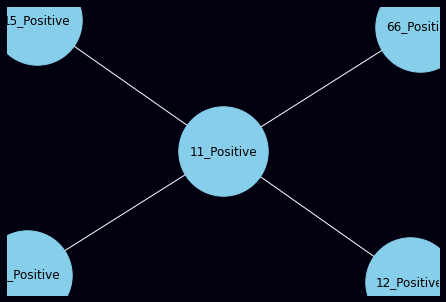

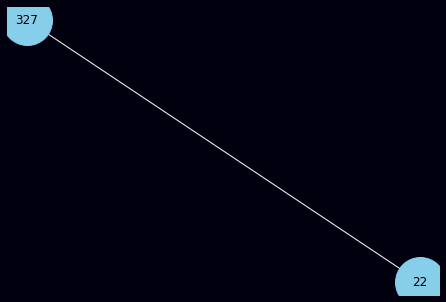

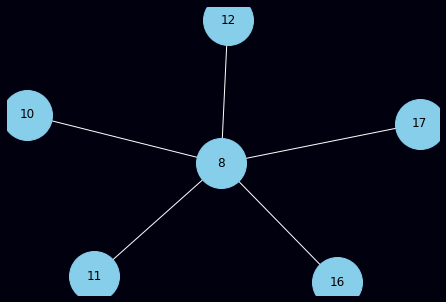

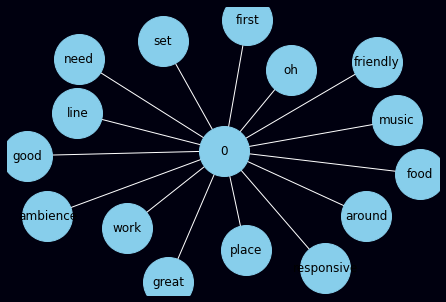

In [12]:
def Run_program_all():
        ch=['Justifying_prediction','Sameuser','Samehotel','Word']
        for kk in ch:
                Run_program(kk)
Run_program_all()